In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
# boston.data returns 2D Array of dataset and boston.target returns 1D Array of labels
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
df["PRICE"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Feature Engineering

In [6]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

* Perform train test split before data preprocessing to avoid data leakage

In [7]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=45)

In [8]:
X_train['ZN'].value_counts()

0.0      277
20.0      15
80.0      11
12.5       9
25.0       8
22.0       8
40.0       7
30.0       4
90.0       4
45.0       4
28.0       3
55.0       3
60.0       3
95.0       3
33.0       3
52.5       2
21.0       2
75.0       2
34.0       2
35.0       2
70.0       2
85.0       2
82.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [9]:
X_test['ZN'].value_counts()

0.0     95
20.0     6
80.0     4
25.0     2
45.0     2
22.0     2
30.0     2
21.0     2
33.0     1
82.5     1
52.5     1
75.0     1
12.5     1
34.0     1
70.0     1
90.0     1
95.0     1
17.5     1
60.0     1
35.0     1
Name: ZN, dtype: int64

In [10]:
X_train["ZN"] = X_train["ZN"].replace(0, X_train['ZN'].mean())

<ipython-input-10-beff19bd2902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["ZN"] = X_train["ZN"].replace(0, X_train['ZN'].mean())


* We replace the 0s in the TEST set with mean of 0s of TRAINING set to avoid data leakage. Our model must not have any information about test set

In [11]:
# We replace the 0s in the TEST set with mean of 0s of TRAINING set to avoid data leakage. Our model must not
X_test["ZN"] = X_test["ZN"].replace(0, X_train['ZN'].mean())

<ipython-input-11-0b5b70803698>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["ZN"] = X_test["ZN"].replace(0, X_train['ZN'].mean())


In [12]:
print(X_test['ZN'].value_counts())
print(X_train['ZN'].value_counts())

19.943832    95
20.000000     6
80.000000     4
45.000000     2
22.000000     2
25.000000     2
21.000000     2
30.000000     2
60.000000     1
90.000000     1
70.000000     1
34.000000     1
75.000000     1
17.500000     1
33.000000     1
82.500000     1
52.500000     1
12.500000     1
95.000000     1
35.000000     1
Name: ZN, dtype: int64
11.522427     277
20.000000      15
80.000000      11
12.500000       9
25.000000       8
22.000000       8
40.000000       7
30.000000       4
90.000000       4
45.000000       4
28.000000       3
55.000000       3
60.000000       3
95.000000       3
33.000000       3
52.500000       2
21.000000       2
75.000000       2
34.000000       2
35.000000       2
70.000000       2
85.000000       2
82.500000       1
100.000000      1
18.000000       1
Name: ZN, dtype: int64


### Transform continous features into normal distribution using log transformation

* As we saw in EDA : CRIM, ZN, INDUS, NOX, AGE, DIS, TAX, PTRATIO B, LSTAT are not normally distributed. Only RM feature follows the Normal Distribution

In [13]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for feature in features:
    X_train[feature]=np.log(X_train[feature])

<ipython-input-13-712141afabed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature]=np.log(X_train[feature])


In [14]:
for feature in features:
    X_test[feature]=np.log(X_test[feature])

<ipython-input-14-4b61203e9e64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature]=np.log(X_test[feature])


### Multicollinearity

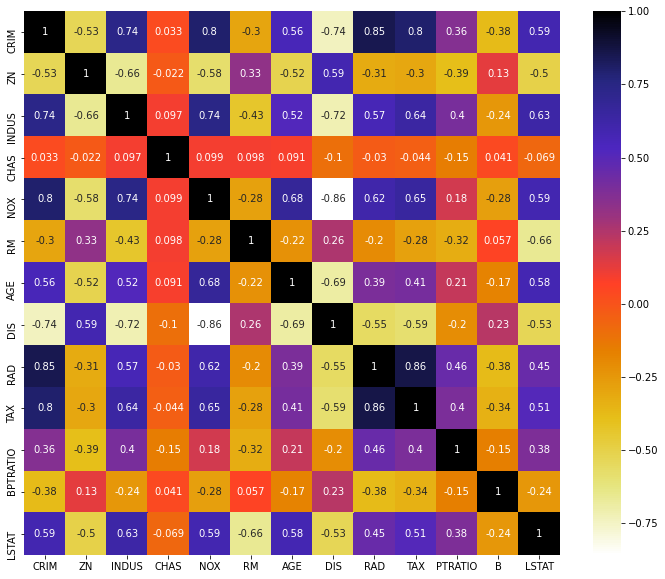

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [16]:
def multicoll(dataset, threshold):
    cols_remove = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            if i!=j and abs(corr_matrix.iloc[i,j]) > threshold:
                cols_remove.append([corr_matrix.columns[i], corr_matrix.columns[j]])
                
    return cols_remove


In [17]:
def clean(cols):
    n = len(cols)
    i = 0
    while i < n:
        li = cols[i]
        j = 0
        while j < n:
            new_li = cols[j]
            if i!=j and li[0] == new_li[1] and li[1] == new_li[0]:
                cols.remove(new_li)
                n = n-1
            
            j = j+1
        i = i+1
                
    return cols

In [18]:
cols = multicoll(X, 0.85)
cols

[['RAD', 'TAX'], ['TAX', 'RAD']]

In [19]:
new_cols = clean(cols)
new_cols

[['RAD', 'TAX']]

In [20]:
# X_train.drop('RAD', axis=1, inplace=True)
# X_test.drop('RAD', axis=1, inplace=True)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_dataset):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return vif

calculate_vif(X_train)

,Features,VIF
0,CRIM,8.746492
1,ZN,51.925481
2,INDUS,34.324573
3,CHAS,1.181955
4,NOX,62.025744
5,RM,140.190600
6,AGE,104.430615
7,DIS,26.848982
8,RAD,10.952304
9,TAX,724.278884


### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data (mean=0, sigma=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.076910,-0.508067,-0.423456,-0.276956,-0.331466,1.595997,0.313360,0.417134,-0.147659,-0.489711,-0.399306,0.253531,-1.376265
1,-1.477356,3.047854,-2.290625,-0.276956,-1.477112,1.271126,-2.300800,1.557426,-0.730603,0.197527,-0.588653,0.233531,-1.479561
2,0.941974,-0.508067,1.068371,3.610684,2.368943,-1.252091,0.846134,-1.712167,-0.497425,0.203860,-1.772159,0.276825,1.561110
3,-0.764167,-0.508067,-1.622653,-0.276956,-0.522073,-0.959270,0.674560,-0.193584,-0.730603,-1.672877,-0.214263,0.256726,0.458220
4,0.172826,-0.508067,-0.070282,-0.276956,-0.035303,-0.456666,0.078623,0.652687,-0.614014,-0.489711,1.131733,0.276825,-0.432533


In [23]:
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.352474,-0.375327,-0.321895,-0.259281,-0.988112,-1.282155,0.754558,1.128748,-0.821630,-1.279445,-0.233093,0.374262,1.664310
1,-1.548190,-0.704875,-2.357337,-0.259281,-1.350735,1.014654,-0.096011,1.960422,-0.821630,-1.466752,0.062310,0.363290,-0.473569
2,1.002259,-0.375327,0.894835,-0.259281,0.559242,0.847614,0.134450,-0.418306,1.512008,1.317162,0.697774,0.306027,0.116571
3,0.892745,-0.375327,0.894835,-0.259281,0.304913,-0.052251,-0.342770,0.418921,1.512008,1.317162,0.697774,0.349292,-0.038252
4,-0.277490,-0.375327,-0.458890,-0.259281,-0.409905,1.798667,-2.358092,0.110073,-0.266001,-0.597543,-0.451256,0.314939,-1.619757


## Model Training

In [24]:
# Model Performance on TRAINING SET

def model_trainingset_performance(model, X_train, y_train):
    print('Model Performance on TRAINING SET')
    
    pred_train = model.predict(X_train)

    print('R Squared : ', model.score(X_train, y_train))
    print("Adjusted R Squared : ", r2_score(y_train, pred_train))
    print("Mean Squared Error : ", mean_squared_error(y_train, pred_train))
    print('Mean Absolute Error : ', mean_absolute_error(y_train, pred_train))

In [25]:
# Model Performance on TEST SET

def model_testset_performance(model, X_test, y_test):
    print('Model Performance on TEST SET')
    
    pred_test = model.predict(X_test)

    print('R Squared : ', model.score(X_test, y_test))
    print("Adjusted R Squared : ", r2_score(y_test, pred_test))
    print("Mean Squared Error : ", mean_squared_error(y_test, pred_test))
    print('Mean Absolute Error : ', mean_absolute_error(y_test, pred_test))

### 1. Lasso Regression

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso

In [27]:
# alpha=1.0 by default
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [28]:
# Model Performance on TEST SET

model_testset_performance(lasso, X_test, y_test)

Model Performance on TEST SET
R Squared :  0.7334134360974078
Adjusted R Squared :  0.7334134360974078
Mean Squared Error :  27.012429603124783
Mean Absolute Error :  3.9886582338061576


In [29]:
# Model Performance on TRAINING SET

model_trainingset_performance(lasso, X_train, y_train)

Model Performance on TRAINING SET
R Squared :  0.688074684020661
Adjusted R Squared :  0.688074684020661
Mean Squared Error :  24.55903859015454
Mean Absolute Error :  3.4015436742133116


In [30]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations
# alphas -> List of alphas where to compute the models. If None alphas are set automatically.
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [31]:
# best alpha parameter as a result from Cross Validation
alpha = lasscv.alpha_
alpha

0.0008410404410880537

In [32]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0008410404410880537)

In [33]:
# Model Performance on TEST SET

model_testset_performance(lasso_reg, X_test, y_test)

Model Performance on TEST SET
R Squared :  0.8165464801055993
Adjusted R Squared :  0.8165464801055993
Mean Squared Error :  18.58880364804749
Mean Absolute Error :  3.2285412977584595


In [34]:
# Model Performance on TRAINING SET

model_trainingset_performance(lasso_reg, X_train, y_train)

Model Performance on TRAINING SET
R Squared :  0.7787690489283083
Adjusted R Squared :  0.7787690489283083
Mean Squared Error :  17.418334410106507
Mean Absolute Error :  2.961984270225792


In [35]:
# Weights for each parameter

print(X_train.columns)
print(lasso_reg.coef_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
[-0.14292377 -0.36109343 -0.74117798  0.61534088 -2.38184729  1.88470729
  0.63934556 -3.25580482  1.74876802 -1.55391853 -1.74748207  0.87074472
 -5.23572929]


## 2. Ridge Regression

In [36]:
from sklearn.linear_model import Ridge, RidgeCV

In [37]:
# alpha=1.0 by default
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [38]:
# Model Performance on TEST SET

model_testset_performance(ridge, X_test, y_test)

Model Performance on TEST SET
R Squared :  0.8163171306657394
Adjusted R Squared :  0.8163171306657394
Mean Squared Error :  18.612042949788872
Mean Absolute Error :  3.224879901166687


In [39]:
# Model Performance on TRAINING SET

model_trainingset_performance(ridge, X_train, y_train)

Model Performance on TRAINING SET
R Squared :  0.7787512528499401
Adjusted R Squared :  0.7787512528499401
Mean Squared Error :  17.41973556144951
Mean Absolute Error :  2.9580126533869935


In [40]:
alphas = np.linspace(0,10, 50)
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
        cv=10, normalize=True)

In [41]:
ridgecv.alpha_

0.0

In [42]:
ridge_reg = Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.0)

In [43]:
# Model Performance on TEST SET

model_testset_performance(ridge_reg, X_test, y_test)

Model Performance on TEST SET
R Squared :  0.8165116199238064
Adjusted R Squared :  0.8165116199238064
Mean Squared Error :  18.592335927367376
Mean Absolute Error :  3.22959543744925


In [44]:
# Model Performance on TRAINING SET

model_trainingset_performance(ridge_reg, X_train, y_train)

Model Performance on TRAINING SET
R Squared :  0.7787695470112688
Adjusted R Squared :  0.7787695470112688
Mean Squared Error :  17.418295194185195
Mean Absolute Error :  2.9629863757779726


## 3. Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [47]:
# Model Performance on TEST SET

model_testset_performance(lg, X_test, y_test)

Model Performance on TEST SET
R Squared :  0.8165116199238069
Adjusted R Squared :  0.8165116199238069
Mean Squared Error :  18.59233592736732
Mean Absolute Error :  3.2295954374492433


In [48]:
# Model Performance on TRAINING SET

model_trainingset_performance(lg, X_train, y_train)

Model Performance on TRAINING SET
R Squared :  0.7787695470112688
Adjusted R Squared :  0.7787695470112688
Mean Squared Error :  17.418295194185195
Mean Absolute Error :  2.962986375777975


In [49]:
from sklearn.model_selection import GridSearchCV

param = {'fit_intercept' : [True, False]}

search = GridSearchCV(LinearRegression(), param, scoring='r2')
search.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [50]:
search.best_params_

{'fit_intercept': True}

## 4. Elastic Net Regression

In [51]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

In [52]:
# alpha = 1.0 by default
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)

ElasticNet()

In [53]:
# Model Performance on TEST SET

model_testset_performance(elastic_net, X_test, y_test)

Model Performance on TEST SET
R Squared :  0.6892919559912318
Adjusted R Squared :  0.6892919559912318
Mean Squared Error :  31.483128943355705
Mean Absolute Error :  4.141565355625956


In [54]:
# Model Performance on TRAINING SET

model_trainingset_performance(elastic_net, X_train, y_train)

Model Performance on TRAINING SET
R Squared :  0.6678755205808802
Adjusted R Squared :  0.6678755205808802
Mean Squared Error :  26.149393745679248
Mean Absolute Error :  3.37647039448733


In [55]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [56]:
elasticCV.alpha_

0.016298069926081547

In [57]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal

elasticCV.l1_ratio

0.5

In [58]:
elastic = ElasticNet(elasticCV.alpha_)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.016298069926081547)

In [59]:
# Model Performance on TEST SET

model_testset_performance(elastic, X_test, y_test)

Model Performance on TEST SET
R Squared :  0.8160040901055392
Adjusted R Squared :  0.8160040901055392
Mean Squared Error :  18.64376242571272
Mean Absolute Error :  3.2096890117612675


In [60]:
# Model Performance on TRAINING SET

model_trainingset_performance(elastic, X_train, y_train)

Model Performance on TRAINING SET
R Squared :  0.7784381368501228
Adjusted R Squared :  0.7784381368501228
Mean Squared Error :  17.444388347000324
Mean Absolute Error :  2.9411789338410226


* All models give similar accuracy on test set. Elastic Net has the lowest mean absolute error.

In [63]:
import pickle
pickle.dump(elastic, open('elastic_net.pickle', 'wb'))